In [1]:
# Import data_analysis packages
import numpy as np
import pandas as pd
import seaborn as sns
from glycompare import *

# Import file management and plot packages
import io
import os
import base64
import json
from glypy.io import glycoct
from os import path
from importlib import reload
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

# from scipy.stats import zscore
# from copy import deepcopy
# from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas


Thanks for using the GlyCompare v1.1, 
Please check our github for the latest update.


Bokan & Ben,
10/2/2019




# 0. Input files format

## 0a. Variable annotation file

The variable annotation file should be named as the concatnation of the project_name and "_variable_annotation.csv" (you will also need to specify project_name in cell 1a)

The essential columns of variable annotation file are Name and Glycan Structure (Name and Composition if you have composition data). Column Name contains the IDs for glycans. Column Glycan Structure contains one of the structure syntax for the glycans. The syntax could be one of glycoCT, WURCS, linearCode, IUPAC-extended, and glytoucan ID. Column Composition contains the composition data of glycans in the form like HexNAc(2)Hex(2).

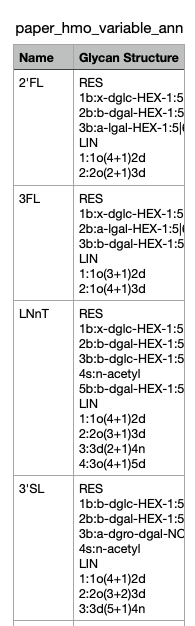

In [27]:
from IPython.display import Image
PATH = "/Users/zhangyujie/Desktop/structure_example.png"
Image(filename = PATH, width=300, height=300)

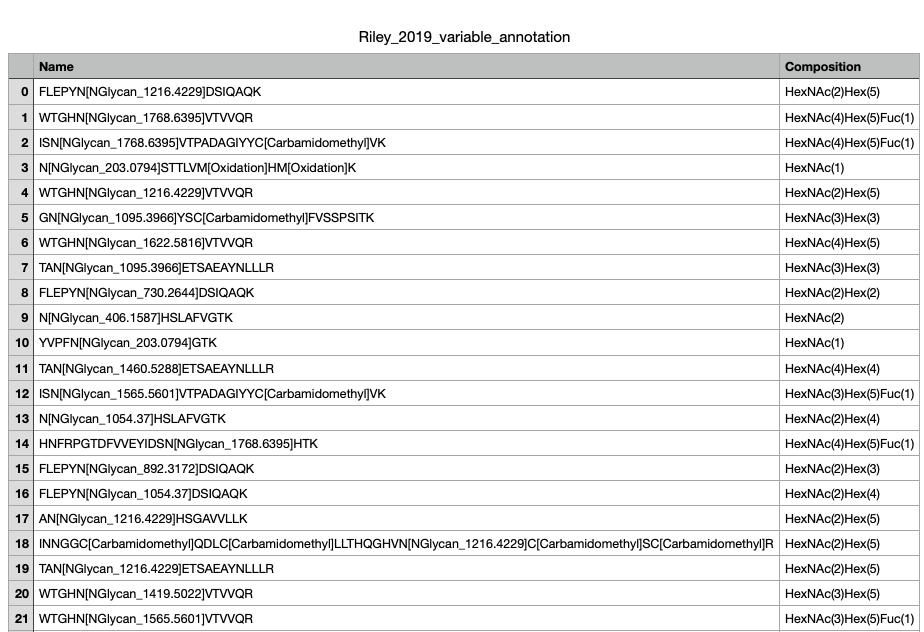

In [22]:
PATH = "/Users/zhangyujie/Desktop/composition_example.png"
Image(filename = PATH, width=800, height=800)

## 0b. Glycan abundance table

The glycan abundance table should be named as the concatnation of the project_name and "_abundance_table.csv" (you will also need to specify project_name in cell 1a)

The row index in the abundance table are sample names, and the column names are glycan names. Each cell (i, j) contains the abundance value of glycan j in sample i

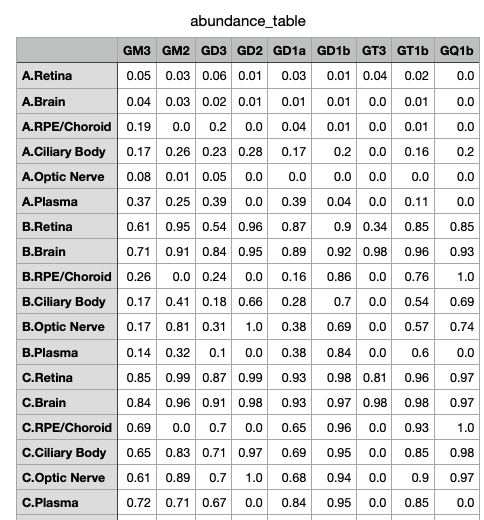

In [26]:
PATH = "/Users/zhangyujie/Desktop/abundance_example.png"
Image(filename = PATH, width=500, height=500)

# 1. Assign addresses for required files

## 1a. Set up glyCompare working environment

In [8]:
# Set this to the path that has the database file
glytoucan_db_addr = '../data/glytoucan_database.json' 

num_processors = 1

# Set your project name. All generated files will use project_name as prefix in their file names
project_name = "CFG_Tissue_N2" 

# Set this to an existing address that saves input and output files of glyCompare for the project
# The last folder of the directory is better to be the project_name.
working_addr = "/Users/zhangyujie/Desktop/Lewis Lab/Extra_project_Austin/CFG_Tissue_N2"

# Set this to the folder that contains the reference motif vectors files.
reference_dir = "/Users/zhangyujie/Desktop/Lewis Lab/glyCompareWebApp_venv/static/reference"

# Initiator
keywords_dict = pipeline_functions.load_para_keywords(project_name, working_addr, 
                                                      glytoucan_db_addr=glytoucan_db_addr, reference_addr = reference_dir)
reload(pipeline_functions)
pipeline_functions.check_init_dir(keywords_dict)

# Read the cell right below and upload input files

/Users/zhangyujie/Desktop/Lewis Lab/glyCompareWebApp_venv/static/reference/linkage_specific/unicarb_substructures.linkSpecific.merged_reference_dict_28818_2020-09-19_17:59:33.json
/Users/zhangyujie/Desktop/Lewis Lab/glyCompareWebApp_venv/static/reference/structure_only/unicarb_substructures.linkAmbiguous.merged_reference_dict.json
Check if the required files exist
files checked
Check if the required files exist
files checked
Successfully created the directory need, please add the source file is the directory


## Manually upload required files

After running the above cell, please put your variable annotation file and glycan abundance file to the created project folder under source_data directory (< working_addr >/source_data/).

Both input files should have the project_name as their name prefix and solid "_variable_annotation.csv" and "_abundace_table.csv" right after (i.e. Sibille_2016_variable_annotation.csv and Sibille_2016_abundance_table.csv).

## Read this before going forward !!!!!

----------------
----------------
#### If the input glycans have structure data (glycoCT, WURCS, linearCode, IUPAC-extended, or glytoucan ID), please follow the section 2. Structure data analysis right after. 

----------------
----------------

#### If the input glycans have composition data ("HexNAc(1)", "HexNAc(3)Hex(6)Fuc(1)", etc.), please follow the section 3. Composition data analysis. 

-----------------
-----------------

# 2. Structure data analysis

## 2a. User Input

In [14]:
# Specify your input glycan structure type, 
# it can be one of glycoCT, WURCS, linearCode, IUPAC-extended, or glytoucan ID
glycan_structure_type = "glycoCT"

# Specify your root for glycan synthesis, 
# it can be one of N-glycan, O-glycan, glycolipid, or None. 

# N-glycan: Manα1-3(Manα1-6)Manβ1-4GlcNAcβ1-4GlcNAc
# O-glycan: GalNAc
# glycolipid: Galβ1-4Glc (lactose)
# None: Epitope (Every monosaccharide is a root)
glycan_root = ""

if glycan_root == "N-glycan":
#     glycan_root_glycoct = "RES\n1b:x-dglc-HEX-x:x\n2s:n-acetyl\n3b:b-dglc-HEX-x:x\n4s:n-acetyl\n5b:b-dman-HEX-1:5\n6b:a-dman-HEX-1:5\n7b:a-dman-HEX-1:5\nLIN\n1:1d(2+1)2n\n2:1o(4+1)3d\n3:3d(2+1)4n\n4:3o(4+1)5d\n5:5o(3+1)6d\n6:5o(6+1)7d\n"
    glycan_root_glycoct = glycoct.loads("RES\n1b:b-dglc-HEX-1:5\nLIN")
    only_substructures_start_from_root = True
elif glycan_root == "O-glycan":
    glycan_root_glycoct = glycoct.loads("RES\n1b:b-dgal-HEX-x:x\n2s:n-acetyl\nLIN\n1:1d(2+1)2n\n")
    only_substructures_start_from_root = True
elif glycan_root == "glycolipid":
    glycan_root_glycoct = glycoct.loads("RES\n1b:b-dglc-HEX-1:5\n2b:b-dgal-HEX-1:5\nLIN\n1:1o(4+1)2d")
    only_substructures_start_from_root = True
else:
    glycan_root_glycoct = ""
    only_substructures_start_from_root = False

    
# Generate glycoct files. 
pipeline_functions.generate_glycoct_files(keywords_dict, glycan_structure_type)

# Set linkage_specific to True if your input glycan structures has linkage information
# Otherwise set it to False
linkage_specific = False
if linkage_specific == True:
    merged_list = [keywords_dict['linkage_specific_glycoct_reference'], keywords_dict['linkage_specific_wurcs_reference']]
    reference_dict = keywords_dict['linkage_specific_reference']
elif linkage_specific == False:
    merged_list = [keywords_dict['structure_only_glycoct_reference'], keywords_dict['structure_only_wurcs_reference']]
    reference_dict = keywords_dict['structure_only_reference']
    
    
# Input normalization method for input glycan abundance table. 
# Possible methods are: z-score, prob-quotient, None
# prob_quotient stands for probabilistic quotient normalization
norm = "None"

# 2b. Generate glycan dictionary

In [4]:
data_type = 'local_glycoct'
reload(pipeline_functions)
reload(glycan_io)
glycan_dict = pipeline_functions.load_glycans_pip(keywords_dict=keywords_dict,
                                                           data_type=data_type)

Check if the required files exist
files checked
Check if the required files exist
files checked
Successfully created the directory need, please add the source file is the directory
end loading glycoct from  /Users/zhangyujie/Desktop/test/glycoct/
Saved /Users/zhangyujie/Desktop/test/output_data/test_glycan_glycoct_dict.json for future use. You can use "used" in the datatype next time
start parallel parsing 16 glycans
startstartstartstartstartstartstartstart       LNT LSTcLSTbFDSLNHLNFP III2'FLLNFP I

LNFP II





2'FL 3 0.009857892990112305
LNT 4 0.09451603889465332
LNFP III startstart5  3FL0.10774707794189453

 start 3FLDFLNTLNnT 
3 0.01039576530456543

start DSLNH
LNFP I 5LSTc  50.2058582305908203
 0.2268848419189453
start startDFLNH 
FLNH
LNnT LSTbLNFP II 5 0.1764850616455078
4start  3'SL
0.11412477493286133
3'SL 3start  0.009539127349853516DSLNT
 
5 0.292971134185791
DFLNT 6 0.36522483825683594
DSLNT 6 0.31398606300354004
FLNH 7 0.5446357727050781
DFLNH 8 0.894514799118042
DSLNH 8 

# 2c. Create glycan substructure occurance dictionary

In [20]:
# Create glycan_substructure_occurance_dict
matched_dict = pipeline_functions.extract_and_merge_substrutures_pip(keywords_dict, num_processors=num_processors,
                                                                     linkage_specific=linkage_specific, forced=True, 
                                                                     merged_list = merged_list, 
                                                                     reference_dict_addr = reference_dict)
keywords_dict = pipeline_functions.load_para_keywords(project_name, working_addr, glytoucan_db_addr=glytoucan_db_addr, reference_addr = reference_dir)

/Users/zhangyujie/Desktop/Lewis Lab/glyCompareWebApp_venv/static/reference/linkage_specific/unicarb_substructures.linkSpecific.merged_reference_dict_28818_2020-09-19_17:59:33.json
/Users/zhangyujie/Desktop/Lewis Lab/glyCompareWebApp_venv/static/reference/structure_only/unicarb_substructures.linkAmbiguous.merged_reference_dict_12750_2020-09-19_18:23:47.json


# 2d. Create glycoprofile_list

In [40]:
# Create glycoprofile_list
glycan_abd_table = pd.read_csv(os.path.join(keywords_dict['source_dir'], project_name + '_abundance_table.csv'), index_col=0)
if norm == "z-score":
    glycan_abd_table = normalization(glycan_abd_table, style = "std")
elif norm == "prob-quotient":
    glycan_abd_table = normalization(glycan_abd_table, style = "pq")
elif norm == "None":
    glycan_abd_table = glycan_abd_table
glycan_abd_table = glycan_abd_table.transpose()
pd.set_option('use_inf_as_na', True)
glycan_abd_table = glycan_abd_table.dropna(axis=0, how="all")
glycan_abd_table = glycan_abd_table.dropna(axis=1, how="all")
reload(pipeline_functions)
from glycompare import process_glycoprofiles
reload(process_glycoprofiles)
_, glycoprofile_list = pipeline_functions.glycoprofile_pip(keywords_dict, glycan_abd_table, unique_glycan_identifier_to_structure_id=True, already_glytoucan_id=True, external_profile_naming=False, forced=True)

abd_list 110 profile_list 16
110 16
no external profile naming found


# 2e. Generate motif abundance table

In [42]:
motif_abd_table, motif_lab, merged_weights_dict=pipeline_functions.select_motifs_pip(keywords_dict, 
                                                                     linkage_specific=linkage_specific,     
                                                                     only_substructures_start_from_root=only_substructures_start_from_root,
                                                                     core=glycan_root_glycoct,
                                                                     drop_parellel=False,
                                                                     drop_diff_abund=False,
                                                                     select_col= [])
if linkage_specific == True:
    merged_list = [keywords_dict['linkage_specific_glycoct_reference'], keywords_dict['linkage_specific_wurcs_reference']]
    reference_dict = keywords_dict['linkage_specific_reference']
elif linkage_specific == False:
    merged_list = [keywords_dict['structure_only_glycoct_reference'], keywords_dict['structure_only_wurcs_reference']]
    reference_dict = keywords_dict['structure_only_reference']
reference_vector = json.load(open(reference_dict, "r"))
motif_glycoct = json.load(open(keywords_dict['motif_glycoct_dict_addr'], "r"))
motif_names = {}
name2ind = {}
for key in motif_glycoct.keys():
    gct = motif_glycoct[key]
    ref_name = reference_vector[gct]
    motif_names[key] = ref_name
    name2ind[ref_name] = int(key)
# if os.path.isfile(keywords_dict['external_profile_naming_addr']):
#     profile_names = json.load(open(keywords_dict['external_profile_naming_addr'], "r"))
#     motif_abd_table.columns = [profile_names[i] for i in list(motif_abd_table.columns)]
motif_abd_table.index = [motif_names[str(i)] for i in list(motif_abd_table.index)]

motif_abd_table_addr = keywords_dict['motif_abd_table_addr']
motif_abd_table.to_csv(motif_abd_table_addr)

<class 'str'>
start building dependence_tree
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
Start dropping nodes with weight zero, nodes count: 2653
Nodes left []
2653 9084
_a.nodes 2653
_a.nodes 2653
merged_weights_dict 2653
After first drop 2156 + 497 =  2653 2653.0
mod_nodes 497
mod_edges 894
after selection, the nodes preserved:  [0, 1, 3, 5, 6, 7, 8, 9, 12, 13, 15, 17, 18, 19, 20, 22, 23, 24, 25, 30, 31, 33, 35, 36, 37, 39, 40, 41, 42, 43, 44, 50, 54, 57, 59, 61, 66, 68, 69, 70, 71, 72, 73, 74, 75, 82, 83, 84, 86, 92, 100, 101, 106, 108, 116, 117, 118, 121, 122, 123, 125, 126, 127, 128, 136, 137, 140, 142, 144, 153, 154, 167, 169, 170, 174, 186, 193, 197, 198, 199, 201, 204, 205, 206, 207, 208, 209, 211, 212, 213, 215, 223, 225, 226, 227, 230, 231, 232, 233, 237, 249, 250, 257, 267, 269, 270, 272, 278, 284, 287, 308, 314, 320, 321, 323, 326, 327, 328, 329, 332, 333, 334, 336, 337, 339, 342, 343, 344, 346, 348, 360, 363, 364, 365, 366, 368, 370, 371, 372, 374, 383, 393, 396, 39

# 2f. Clustering Analysis

In [44]:
# Draw glycans
reload(plot_glycan_utilities)
if not os.path.isdir(keywords_dict['plot_output_dir'] + "glycan_plots"):
    os.mkdir(keywords_dict['plot_output_dir'] + "glycan_plots")
for i in motif_abd_table.index:
    plot_glycan_utilities.plot_glycan(motif_lab.substructure_vec[name2ind[i]], title=i, label=True, addr = keywords_dict['plot_output_dir'] + "glycan_plots/glycan_" + str(i) + ".png")

    
# Draw heat map and cluster map
reload(pipeline_functions)
motif_abd_table = motif_abd_table.dropna(axis = 1)
index = list(motif_abd_table.index)
unique_rows = motif_abd_table.stack().groupby(level=0).apply(lambda x: x.unique().tolist())
for i in range(len(index)):
    if len(unique_rows[index[i]]) == 1:
        print("Row " +  str(index[i]) + " is dropped from motif_abd_table becuase it contains same values")
        motif_abd_table = motif_abd_table.drop([index[i]])
glycoprofile_cluster_dict, glyco_motif_cluster_dict = pipeline_functions.clustering_analysis_pip(keywords_dict=keywords_dict, 
                                           motif_abd_table=motif_abd_table, 
                                           select_profile_name = [])

Row S3 is dropped from motif_abd_table becuase it contains same values
Row S21 is dropped from motif_abd_table becuase it contains same values
Row S51 is dropped from motif_abd_table becuase it contains same values
Row S12071 is dropped from motif_abd_table becuase it contains same values


Now you should be able to find motif abundance table and other output file in the project folder under output_data directory ((< working_addr >/output_data/)).

# 3. Composition data analysis

Composition data doesn't provide the structure of glycans; therefore, the motifs are represented as composition too. 

## 3a. User input

In [4]:
# Input normalization method for input glycan abundance table. 
# Possible methods are: z-score, prob-quotient, None
# prob_quotient stands for probabilistic quotient normalization
norm = "None"

## 3b. Generate motif abundance table

In [8]:
protein_sites = "all"
motif_abd, directed_edge_list = pipeline_functions.compositional_data(keywords_dict, protein_sites = protein_sites, reference_vector = None, forced = True, norm = norm)

Constructing motifs map
Constructing directed edge list


Now you should be able to find motif abundance table and directed edge list file in the project folder under output_data directory ((< working_addr >/output_data/)). The directed edge list is potentially used to create network, which is still under construction. 